## This notebook is on Logistic Regression which is used for Classification of the Target Variable into discrete Categories

We will supplement the content of this notebook with the accompanying powerpoint presentation on Logistic Regression

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy.stats as stats

desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')
mylines = []
path = desktop + "\csvFilePath.txt"
with open (path, 'rt') as myfile:
    for myline in myfile:                
        mylines.append(myline)
New_path = mylines[5]

### Data set contains the Age and Whether the respondent bought insurance or not.

Notice, the Target Variable is NOT on a "Continuous" spectrum of values. Itis in two "Discrete" categories "Yes" and "No"

In [13]:
has_insurance = pd.read_csv(New_path[:-1])

In [14]:
has_insurance.head(25)

,Age,Has_Insurance
0,18,0
1,20,0
2,22,0
3,22,0
4,25,0
5,27,0
6,27,0
7,28,0
8,29,0
9,31,0


## As usual, let's try to do a scatter plot of the data

Text(0.5, 1.0, 'Age Vs Has Insurance')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Has_Insurance')

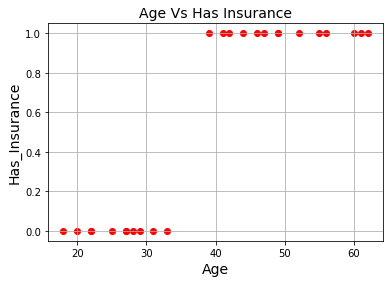

In [15]:
plt.scatter(has_insurance['Age'], has_insurance['Has_Insurance'], color='red')
plt.title('Age Vs Has Insurance', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Has_Insurance', fontsize=14)
plt.grid(True)
plt.show()

## Does not look that great!! Not like what we have seen in Linear Regression. But let's get the Coefficients and Intercept and try to fit a straight line as we did in Linear Regression

In [16]:
x = has_insurance[['Age']]
y = has_insurance['Has_Insurance']

x_list = has_insurance['Age']

In [17]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

LinearRegression()

Intercept: 
 -0.7091829787234041
Coefficients: 
 [0.03221277]


In [18]:
def get_y_pred(x, slope, intercept):
    return (x * slope + intercept)

response_value_list = []
for x_i in x_list:
    response_value_list.append((get_y_pred(x_i, regr.coef_, regr.intercept_)))


Text(0.5, 1.0, 'Age Vs Has Insurance')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Has_Insurance')

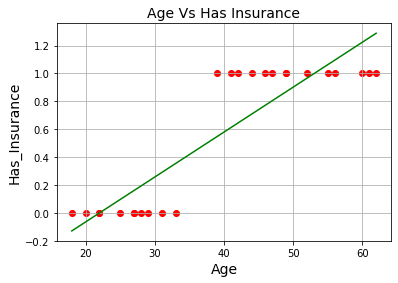

In [19]:
plt.scatter(has_insurance['Age'], has_insurance['Has_Insurance'], color='red')
plt.plot(x_list, response_value_list, color = "g")
plt.title('Age Vs Has Insurance', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Has_Insurance', fontsize=14)
plt.grid(True)
plt.show()

## Now we will apply our Sigmoid Function (refer powerpoint presentation) and find the Best Fit line for Logistic Regression

In [20]:
def sigmoid(x):
    i = 0
    a = []
    while i < len(x):
        pred = regr.coef_ * x[i] + regr.intercept_
        b = 1/(1+math.exp(-pred))
        if b < 0.6:
            b = 0
        else:
            b = 1
        a.append(b)
        i += 1
    return a

s = sigmoid(sorted(x_list))

<function matplotlib.pyplot.show(*args, **kw)>

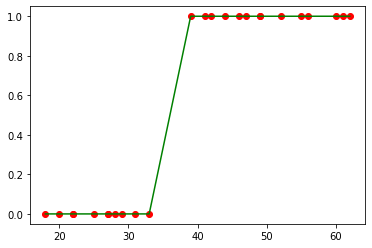

In [21]:
plt.scatter(has_insurance['Age'], has_insurance['Has_Insurance'], color='red')
plt.plot(sorted(x_list), s, color="g")
plt.show

## We will split our data to two sets "Train" (to train the model) and "Test" (to test the prediction of the model. We have arbitrarily decided  for a 80 - 20 split

In [22]:
X = has_insurance[['Age']]
y = has_insurance['Has_Insurance']
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [23]:
X_train
X_test

,Age
24,62
23,61
14,44
1,20
10,33
13,42
8,29
6,27
18,49
4,25


,Age
5,27
2,22
19,52
16,47
11,39
22,60
17,49


## This time we get a Logistic Regression model (instead of a LinearRegression) model from scikitlearn.

After this we **"Train"** the model with our "Train" data, Predict using the Model and **"Test"** the prediction against the "Test" data and get a **"Score"** of how the model performed.

In [24]:
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

LogisticRegression()

array([0, 0, 1, 1, 1, 1, 1], dtype=int64)

1.0

## we also got the prediction for a specific Age

In [25]:
regr.predict([[28]])
regr.predict([[29]])
regr.predict([[55]])

array([0], dtype=int64)

array([0], dtype=int64)

array([1], dtype=int64)

## We got the Probability of "No (will not buy)" and "Yes (will buy)" for the responents in our Test data set

In [26]:
regr.predict_proba(X_test)

array([[9.99213589e-01, 7.86411235e-04],
       [9.99979050e-01, 2.09500825e-05],
       [1.69831614e-05, 9.99983017e-01],
       [6.37595821e-04, 9.99362404e-01],
       [1.74307231e-01, 8.25692769e-01],
       [5.13276550e-08, 9.99999949e-01],
       [1.49568065e-04, 9.99850432e-01]])